# Assignment 3


### Relativity visualization and radiation

On this homework assignment, you will be responsible for importing all of the python packages you need for your calculations. You will also be responsible for making your plot axis labels large enough for me to read them easily. Please make sure to put units on your axes where appropriate.

Instead of defining your own constants, use the pre-programmed values from <tt>scipy.constants</tt>.

In [2]:
# Import your packages here
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

<Figure size 432x288 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


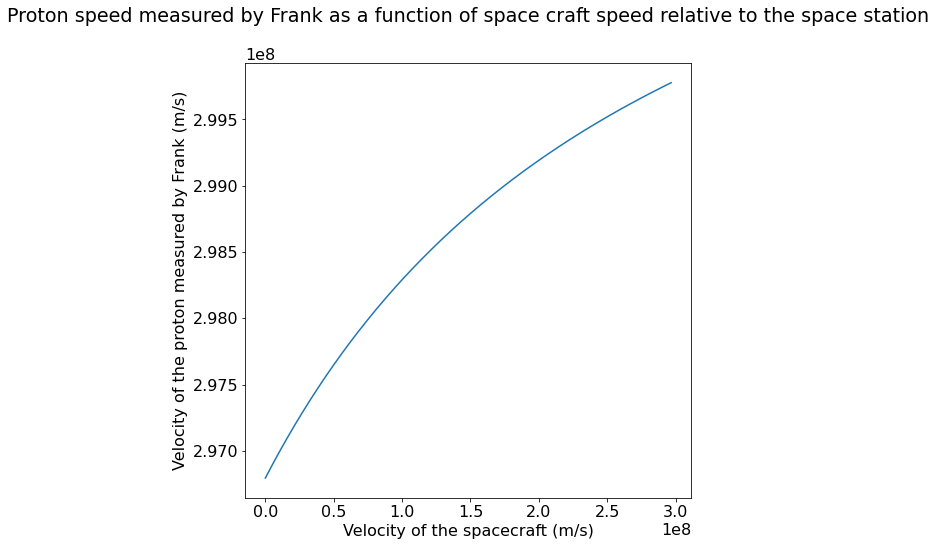

<Figure size 432x288 with 0 Axes>

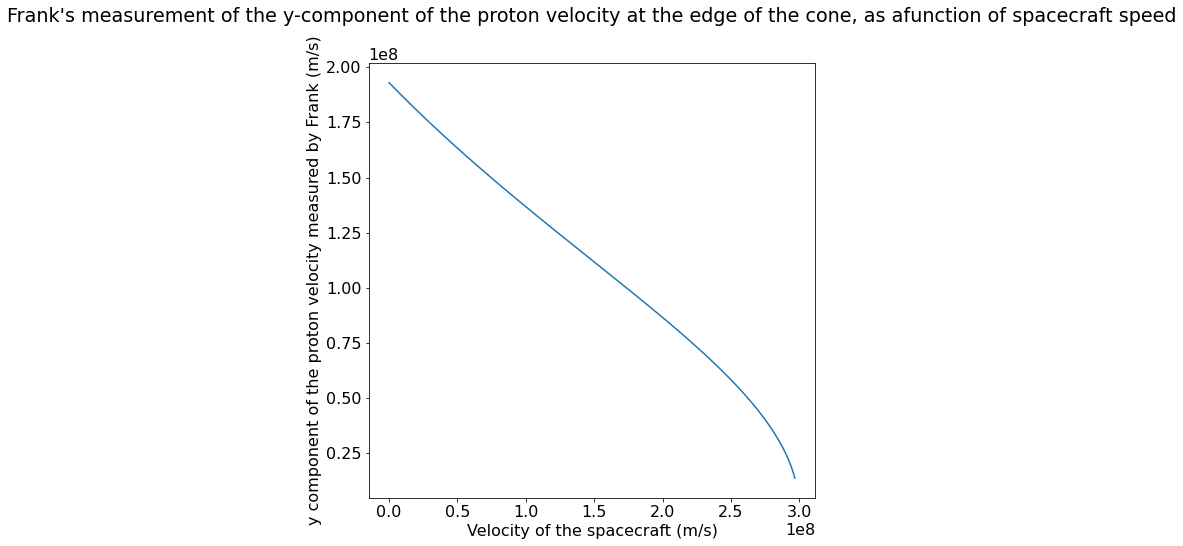

In [3]:
#Part A
#Variables
c = scipy.constants.c
vspacecraft = (np.linspace(0,0.99,1000000))*c #Varying velocity of the spacecraft in m/s
vproton = 0.99*c #Velocity of proton fired by Mary in m/s
Frankprotonspeed = (vproton+vspacecraft)/(1+((vspacecraft*vproton)/(c**2))) #Proton speed measured by Frank in m/s

#Plot part A
plt.figure()
plt.figure(figsize = (8,8))
plt.plot(vspacecraft,Frankprotonspeed)
plt.title("Proton speed measured by Frank as a function of space craft speed relative to the space station", y=1.08)
plt.xlabel("Velocity of the spacecraft (m/s)")
plt.ylabel("Velocity of the proton measured by Frank (m/s)")
plt.show()

#Part B
#New Variables
gamma = 1/np.sqrt(1-((vspacecraft**2)/(c**2)))
Frankprotonspeedcone = vproton*np.sin(15)*gamma*(1-((vspacecraft/(c**2))*Frankprotonspeed)) #Frank's measurement of the y-component of the proton velocity at the edge of the cone in m/s

#Plot part B
plt.figure()
plt.figure(figsize = (8,8))
plt.plot(vspacecraft,Frankprotonspeedcone)
plt.title("Frank's measurement of the y-component of the proton velocity at the edge of the cone, as afunction of spacecraft speed", y=1.08)
plt.xlabel("Velocity of the spacecraft (m/s)")
plt.ylabel("y component of the proton velocity measured by Frank (m/s)")
plt.show()

<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

<Figure size 432x288 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


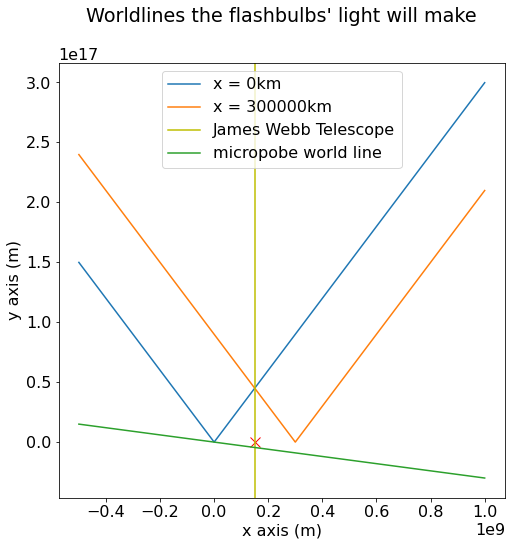

In [65]:
#Part A
#Variables
x = np.linspace(-500000000,1000000000,1000000) #limits of the x axis
ct = np.linspace(0,100000000,1000000) #limits of the y axis
xflashbulb1 = 0 #location of flashbulb 1 in m
xflashbulb2 = 300000000 #location of flashbulb 2 in m

def lightmov(xloc):
    lightloc = c*np.abs(x-xloc)
    return lightloc

flashlight1 = lightmov(xflashbulb1)
flashlight2 = lightmov(xflashbulb2)

#Part B
xtelescope = 150000000 #Location of the James Webb Space Telescope in m

# Part C
def microprobeloc(xloc,relspeed): 
    microprobewl = relspeed*x 
    return microprobewl
microprobestartingloc = 500000000 #Starting location of the 
microprobspeed = -0.1*c # 0.1*c in the negative x direction
microprobeworldline = microprobeloc(microprobestartingloc, microprobspeed)

#Plot
plt.figure()
plt.figure(figsize = (8,8))
plt.plot(x,flashlight1, label = 'x = 0km')
plt.plot(x,flashlight2, label = 'x = 300000km')
plt.plot(150000000,0,'rx',markersize=10)
plt.axvline(x=xtelescope, color='y', label='James Webb Telescope')
plt.plot(x,microprobeworldline, label='micropobe world line' )
plt.title("Worldlines the flashbulbs' light will make", y=1.08)
plt.xlabel("x axis (m)")
plt.ylabel("y axis (m)")
plt.legend()
plt.show()

#Based on this plot, I would say that the flashes were simultaneous from the point of view of the James Webb Space 
#Telescope because  the wordline of both flashes cuts the the James Webb Space Telescope worldline at the 
#same place
#However, I don't think that the flashes were simultaneous from the point of view of the microprobe because from
#the line shown in the graph, they were actually just able to see the light that was emitted from x=0 as it is
#the only wordline that the microprobe's wordline intercepts

<ol start=3>
    <li>Use Wien's displacement law, $\lambda_{\rm max} = \frac{2.898 \times 10^{-3} \mathrm{m} \cdot \mathrm{K}}{T}$, to find and plot the wavelength of maximum intensity for seven different types of stars: O5, B5, A5, F5, G5, K5, M5. Label both axes and each data point on your plot. You may find <a href="https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html">this table</a> of star types and temperatures helpful. Warning: <em>watch your units</em>.</li>
</ol>

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

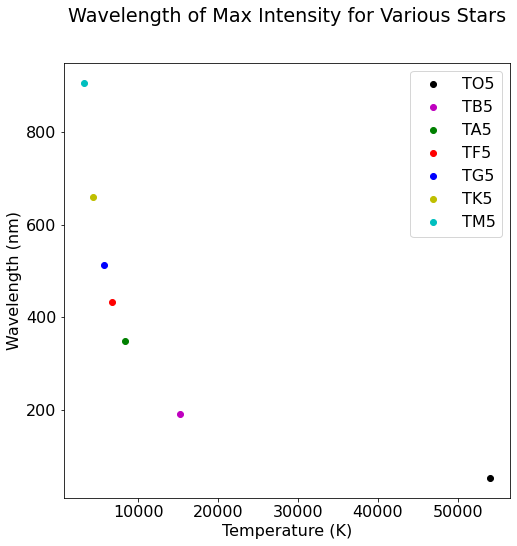

In [64]:
#Function to calculate the wavelengths of maximum intensity depending on temperatures
def wiensdisplacement(startemp):
    maxwavelength = ((2.898e-3)/startemp)*1e9
    return maxwavelength

# Star Temperatures (in K)
TO5 = 54000
TB5 = 15200
TA5 = 8310
TF5 = 6700
TG5 = 5660
TK5 = 4400
TM5 = 3200

# Using Wien's displacement law to fin the wavelength of maximum intensity (in nm)
O5 = wiensdisplacement(TO5) 
B5 = wiensdisplacement(TB5) 
A5 = wiensdisplacement(TA5) 
F5 = wiensdisplacement(TF5) 
G5 = wiensdisplacement(TG5) 
K5 = wiensdisplacement(TK5) 
M5 = wiensdisplacement(TM5) 

#Plotting
plt.figure()
plt.figure(figsize = (8,8))
plt.plot(TO5, O5, 'ko',label ='TO5')
plt.plot(TB5, B5, 'mo',label ='TB5')
plt.plot(TA5, A5, 'go',label ='TA5')
plt.plot(TF5, F5, 'ro',label ='TF5')
plt.plot(TG5, G5, 'bo',label ='TG5')
plt.plot(TK5, K5, 'yo',label ='TK5')
plt.plot(TM5, M5, 'co',label ='TM5')
plt.title("Wavelength of Max Intensity for Various Stars", y=1.08)
plt.xlabel("Temperature (K)")
plt.ylabel("Wavelength (nm)")
plt.legend()
plt.show 


In class we will describe the photoelectric effect qualitatively in terms of photons knocking electrons loose from their atoms. Here we will delve into the photoelectric effect quantitatively. Read about the photoelectric effect in your textbook, then read <em>Photoelectric effect step by step</em> in the Quantization module of Canvas. (Note: <em>Photoelectric effect step by step</em> is designed to go along with a lab, which we don't have.)

A note about units: recall from PHYS 208/245 that 1 Volt = 1 Joule/Coulomb. Electrons and protons give us a fundamental unit of electric charge, or elementary charge, $|q| = e = 1.602 \times 10^{−19}$ C. We can also calculate a fundamental unit of energy by calculating the change in kinetic energy of the elementary charge $e$ accelerated through an electric potential of 1 Volt. This new unit of energy is called the electron-Volt or eV. 1 eV = $1.602 \times 10^{−19}$ J.

<ol start=4>
    <li>Assume you are trying to verify the experimental results that led to Einstein's successful explanation of the photoelectric effect. You have two emitters or "photocathodes"; one is made of aluminum and the other is made of gold. On <strong>one set of axes</strong>, plot the <em>maximum</em> photoelectron kinetic energy in eV that you could measure as a function of frequency $\nu$ from <strong>both photocathodes</strong>. Make sure your plot shows the frequency cutoffs below which <em>no</em> photoelectrons will be generated. Label both axes and put a legend on your plot so a reader with no physics experience will know which curve belongs to which metal. You may find this <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/photoelec.html">table of work functions</a> helpful.</li>
</ol>

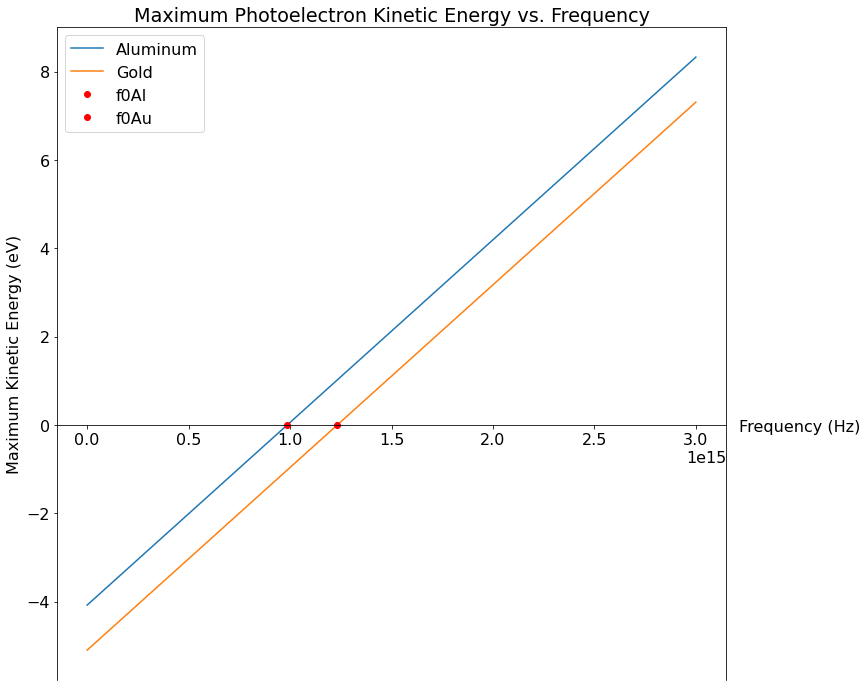

In [63]:
# Variables
h = scipy.constants.h
phiAl = 4.08 #eV
phiAu = 5.1 #eV
frequency = np.linspace(0, 3e15, 1000)  # Varying frequency in Hz

# Function to calculate maximum kinetic energy (in eV)
def maxkineticenergy(frequency, phi):
    maxke = ((h*frequency)/1.602e-19) - phi
    return maxke

# Calculate maximum kinetic energies for both aluminum and gold
maxkeAl = maxkineticenergy(frequency, phiAl)
maxkeAu = maxkineticenergy(frequency, phiAu)

# Plot
plt.figure(figsize=(12, 12))
plt.plot(frequency, maxkeAl, label='Aluminum')
plt.plot(frequency, maxkeAu, label='Gold')
ax = plt.gca()
ax.set_xlabel('Frequency (Hz)', loc='right', fontsize=16);
ax.xaxis.set_label_coords(1.2, 0.4)
plt.plot((phiAl*1.602e-19)/h, 0, 'ro',label ='f0Al') #Point that shows the frequency cutoff for Al
plt.plot((phiAu*1.602e-19)/h, 0, 'ro',label ='f0Au') #Point that shows the frequency cutoff for Au
plt.ylabel('Maximum Kinetic Energy (eV)')
plt.title('Maximum Photoelectron Kinetic Energy vs. Frequency')
plt.legend()
ax.spines['bottom'].set_position('zero')
plt.show()